In [2]:
import ast
import matplotlib.pyplot as plt
import pandas as pd
from utils import advanced_sorting
from scipy.stats import zscore
import numpy as np

In [1]:
df = pd.read_csv('data/results.csv')
df.set_index(['input_size', 'algorithm', 'dim_vs_n', 'run'], inplace=True)
df = df.assign(start_rect_percentile=df['start_rect_position'] / df['start_rect_count']*100)
df.head()

NameError: name 'pd' is not defined

In [19]:
grouped = df.groupby(['input_size', 'algorithm', 'dim_vs_n'])
z_scores = grouped['runtime'].transform(zscore).round(1)
outliers = np.abs(z_scores) >= 3
df.loc[outliers, 'runtime'] = np.nan
df.loc[outliers, 'sorting_time'] = np.nan

In [20]:
algos = df.index.get_level_values('algorithm').unique()

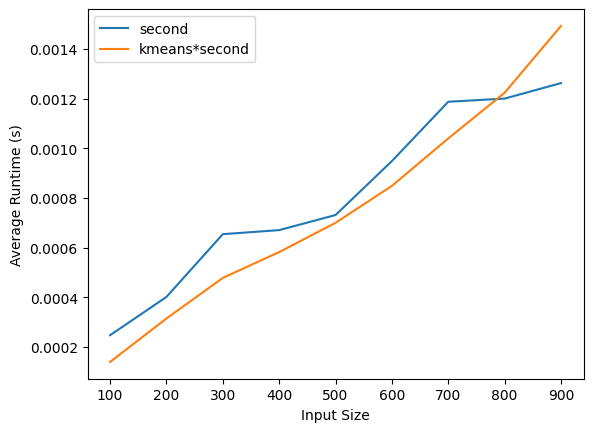

In [21]:
runtimes = df.loc[(slice(None),slice(None), .1, slice(None))].groupby(['algorithm', 'input_size']).runtime.mean()
blacklist = ['height']
whitelist = ['kmeans*second', 'second']

fig, ax = plt.subplots()

for algo in algos:
    if algo in whitelist: runtimes[algo].plot(label=algo)


# Add labels and a legend to the plot
ax.set_xlabel('Input Size')
ax.set_ylabel('Average Runtime (s)')
ax.legend()

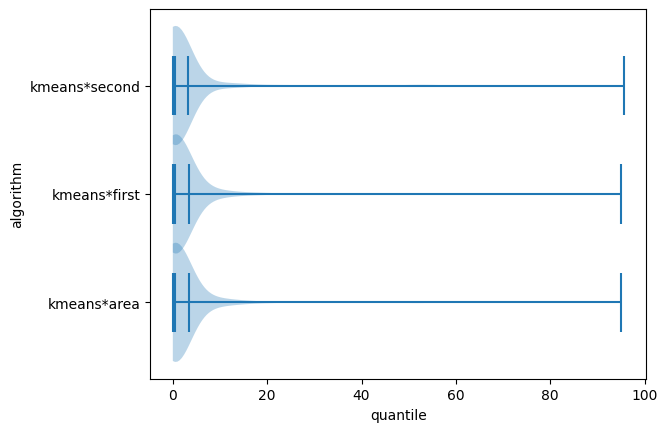

In [22]:
blacklist = []
# Find the maximum value of input_size
max_input_size = df.index.get_level_values('input_size').max()
rows = df.loc[(max_input_size, slice(None), slice(None), slice(None))]
data = [rows.loc[(algo)]["start_rect_percentile"] for algo in algos if algo not in blacklist]

ax = plt.subplot(1,1,1)

plt.violinplot(data, points=200, vert=False, widths=1.1,
               showmeans=True, showextrema=True, showmedians=True,
               bw_method=0.3);

labels = [k for k in algos if k not in blacklist]
ax.set_yticks([i for i in range(1,len(labels)+1)]);
ax.set_yticklabels(labels);
ax.set_xlabel("quantile");
ax.set_ylabel("algorithm");

starting silhouette score calculation at 1680979258.429694
Silhouette Score: 0.9841948979727667
finished ad 1680979258.4311838


<Figure size 100x400 with 0 Axes>

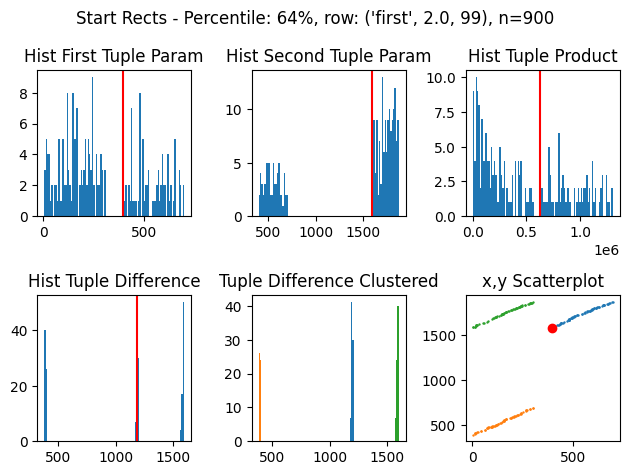

In [23]:
n = 0
row = df.loc[(max_input_size, slice(None), slice(None), slice(None))].iloc[n]
start_rect = ast.literal_eval(row.start_rect)
start_rects = ast.literal_eval(row.start_rects)

plt.figure(figsize=(1, 4))
fig, axs = plt.subplots(2, 3)

plt.suptitle("Start Rects - Percentile: {}%, row: {}, n={}".format(round(row.start_rect_percentile), row.name, max_input_size))


axs[0, 0].set_title('Hist First Tuple Param')
axs[0, 0].hist([x[0] for x in start_rects], bins = 100)
axs[0, 0].axvline(x=start_rect[0], color="red")

axs[0, 1].set_title('Hist Second Tuple Param')
axs[0, 1].hist([x[1] for x in start_rects], bins = 100)
axs[0, 1].axvline(x=start_rect[1], color="red")


axs[0, 2].set_title('Hist Tuple Product')
axs[0, 2].hist([x[0]*x[1] for x in start_rects], bins = 100)
axs[0, 2].axvline(x=start_rect[0]*start_rect[1], color="red")

lines = advanced_sorting(start_rects, return_lists=True)

axs[1,0].set_title("Hist Tuple Difference")
axs[1, 0].hist([x[1]-x[0] for x in start_rects], bins = 100)
axs[1, 0].axvline(x=start_rect[1]-start_rect[0], color="red")

axs[1, 1].set_title('Tuple Difference Clustered')
for line in lines:
    axs[1, 1].hist([x[1]-x[0] for x in line], bins = 3)


axs[1, 2].set_title('x,y Scatterplot')
for line in lines:
    axs[1,2].scatter(x=[x[0] for x in line], y=[x[1] for x in line], s=.5)
axs[1, 2].scatter(x=start_rect[0], y=start_rect[1], color="red")


fig.tight_layout()

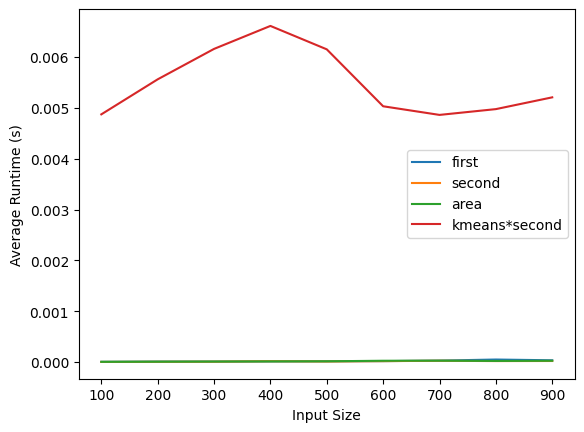

In [24]:
runtimes = df.loc[(slice(None),slice(None), .1, slice(None))].groupby(['algorithm', 'input_size']).sorting_time.mean()
blacklist = ['height', 'random', 'kmeans*first', 'kmeans*area']

fig, ax = plt.subplots()

for algo in algos:
    if algo not in blacklist: runtimes[algo].plot(label=algo)


# Add labels and a legend to the plot
ax.set_xlabel('Input Size')
ax.set_ylabel('Average Runtime (s)')
ax.legend()

starting silhouette score calculation at 1680979344.5620391
Silhouette Score: 0.9841948979727667
finished ad 1680979344.5632849


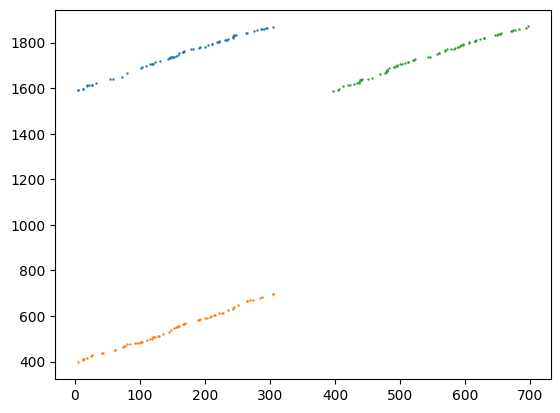

In [28]:
n = 0
row = df.loc[(max_input_size, slice(None), slice(None), slice(None))].iloc[n]
start_rect = ast.literal_eval(row.start_rect)
start_rects = ast.literal_eval(row.start_rects)

lines = advanced_sorting(start_rects, return_lists=True)
for line in lines:
    plt.scatter(x=[x[0] for x in line], y=[x[1] for x in line], s=.5)


plt.show()